In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [4]:
word_index = imdb.get_word_index()

In [5]:
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [6]:
word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [7]:
for _ in train_data[0]:
    print(word_index.get(_ - 3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [8]:
def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))  # Fix: dimensions as tuple
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [9]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [10]:
x_train.shape

(25000, 10000)

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(train_labels).astype("float32")

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

d:\david\learning_platzi\machine_learning\redes_neuronales\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[:10000]

y_val = y_train[:10000]
partial_y_train = y_train[:10000]

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7480 - loss: 0.5525 - val_accuracy: 0.8900 - val_loss: 0.3959
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8838 - loss: 0.3615 - val_accuracy: 0.9281 - val_loss: 0.2800
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9165 - loss: 0.2729 - val_accuracy: 0.9442 - val_loss: 0.2163
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9362 - loss: 0.2172 - val_accuracy: 0.9539 - val_loss: 0.1767
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9493 - loss: 0.1762 - val_accuracy: 0.9680 - val_loss: 0.1425
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9597 - loss: 0.1460 - val_accuracy: 0.9769 - val_loss: 0.1143
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9674 - loss: 0.1223 - val_accuracy: 0.9819 - val_loss: 0.0957
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9757 - loss: 0.1019 - val_accuracy: 0.9857 - val_

In [16]:
import matplotlib.pyplot as plt

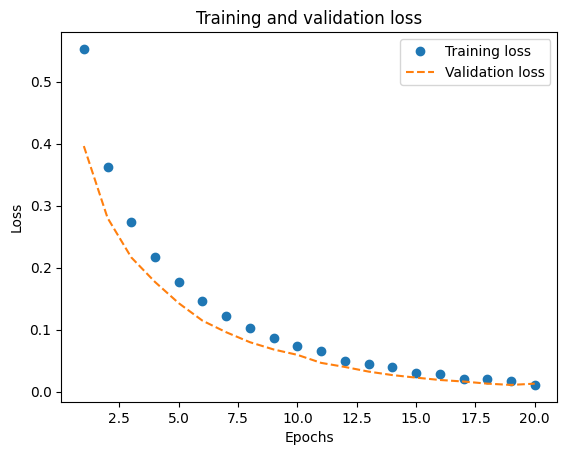

In [17]:
history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'o', label='Training loss')
plt.plot(epochs, val_loss_values, '--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4956 - loss: 3.6321


[3.6320579051971436, 0.4955599904060364]

## Modelo menos complejo

In [23]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation="relu", input_shape=(10000,)))
model2.add(layers.Dense(4, activation="relu"))
model2.add(layers.Dense(1, activation="sigmoid"))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

d:\david\learning_platzi\machine_learning\redes_neuronales\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5874 - loss: 0.6698 - val_accuracy: 0.6492 - val_loss: 0.6274
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7050 - loss: 0.6087 - val_accuracy: 0.7615 - val_loss: 0.5794
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7622 - loss: 0.5662 - val_accuracy: 0.8200 - val_loss: 0.5434
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8019 - loss: 0.5331 - val_accuracy: 0.8084 - val_loss: 0.5128
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8284 - loss: 0.5050 - val_accuracy: 0.8734 - val_loss: 0.4889
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8531 - loss: 0.4819 - val_accuracy: 0.8680 - val_loss: 0.4657
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8705 - loss: 0.4612 - val_accuracy: 0.9095 - val_loss: 0.4492
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8887 - loss: 0.4430 - val_accuracy: 0.9028 - val_los

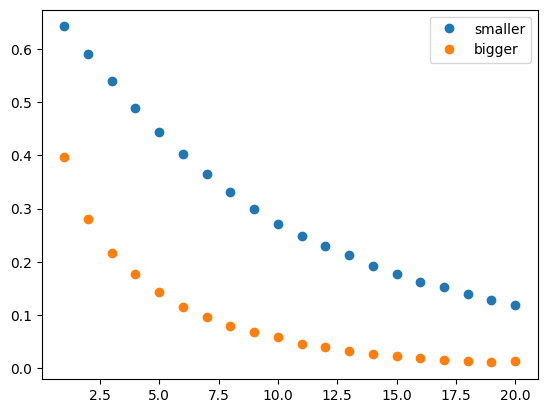

In [22]:
history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
val_loss_values_2 = history2.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_loss_values_2, 'o', label= "smaller")
plt.plot(epochs, val_loss_values, 'o', label= "bigger")
plt.legend()
plt.show()

## regularizacion

In [24]:
from keras import regularizers

In [26]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation="relu", input_shape=(10000,), kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation="sigmoid"))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7138 - loss: 0.6403 - val_accuracy: 0.8858 - val_loss: 0.5023
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8738 - loss: 0.4527 - val_accuracy: 0.9205 - val_loss: 0.3642
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9072 - loss: 0.3511 - val_accuracy: 0.9390 - val_loss: 0.2904
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9290 - loss: 0.2872 - val_accuracy: 0.9255 - val_loss: 0.2720
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9466 - loss: 0.2451 - val_accuracy: 0.9649 - val_loss: 0.2112
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9532 - loss: 0.2216 - val_accuracy: 0.9702 - val_loss: 0.1909
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9607 - loss: 0.2017 - val_accuracy: 0.9757 - val_loss: 0.1743
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9660 - loss: 0.1863 - val_accuracy: 0.9778 - val_los

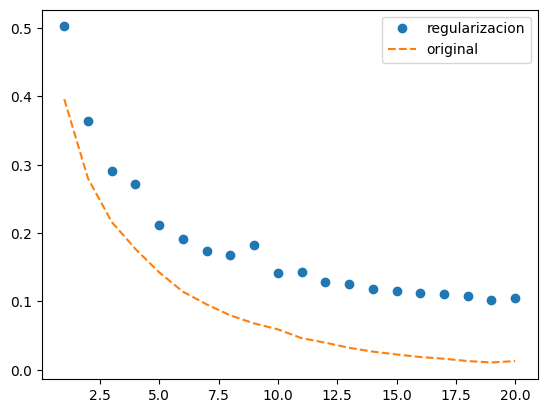

In [27]:
history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
val_loss_values_3 = history3.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_loss_values_3, 'o', label= "regularizacion")
plt.plot(epochs, val_loss_values, '--', label= "original")
plt.legend()
plt.show()

## Dropout

In [28]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation="relu"))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation="sigmoid"))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

d:\david\learning_platzi\machine_learning\redes_neuronales\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6109 - loss: 0.6509 - val_accuracy: 0.8410 - val_loss: 0.5525
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7347 - loss: 0.5517 - val_accuracy: 0.8671 - val_loss: 0.4360
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7983 - loss: 0.4745 - val_accuracy: 0.9126 - val_loss: 0.3466
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8302 - loss: 0.4130 - val_accuracy: 0.9229 - val_loss: 0.2910
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8591 - loss: 0.3714 - val_accuracy: 0.9375 - val_loss: 0.2328
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8820 - loss: 0.3277 - val_accuracy: 0.9460 - val_loss: 0.1956
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8966 - loss: 0.2885 - val_accuracy: 0.9559 - val_loss: 0.1640
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9120 - loss: 0.2552 - val_accuracy: 0.9628 - val_lo

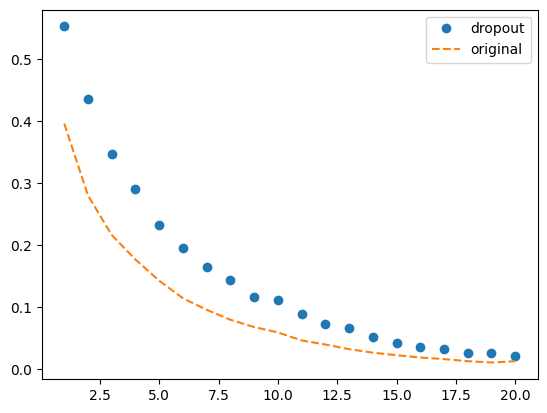

In [29]:
history_dic = history.history
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
val_loss_values_4 = history4.history['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_loss_values_4, 'o', label= "dropout")
plt.plot(epochs, val_loss_values, '--', label= "original")
plt.legend()
plt.show()